In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2


import warnings
warnings.filterwarnings("ignore")

C:\Users\jmanuelc87\AppData\Local\Temp\ipykernel_33768\2341801188.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
image = cv2.imread('../datasets/mountain.jpg')

In [3]:
def euclid_distance(X, xi):
    a = -2 * np.dot(X, xi.T)
    b = np.sum(xi**2, axis=1)
    c = np.sum(X**2, axis=1)[:, np.newaxis]
    return a + b + c

In [4]:
def neighbourhood_points(X, centroid, bandwidth=5):
    distances = euclid_distance(X, centroid)
    return distances <= bandwidth

In [5]:
def gaussian_kernel(distances, bandwidth):
    return (1/(bandwidth*np.sqrt(2*np.pi))) * np.exp(-0.5*((distances / bandwidth))**2)

In [6]:
def mean_shift_segmentation(X, bandwidth=5, distance=100):
    O = np.copy(X)
    past = []
    for i, x in enumerate(X):
        x = x[np.newaxis,:]
        filter = neighbourhood_points(X, x, distance)
        neighbours = X[np.squeeze(filter)]
        distances = euclid_distance(neighbours, x)
        weight = gaussian_kernel(distances, bandwidth)
        new = np.dot(neighbours.T, weight) / np.sum(weight)
        
        O[i] = new.reshape(-1)
    return O, past

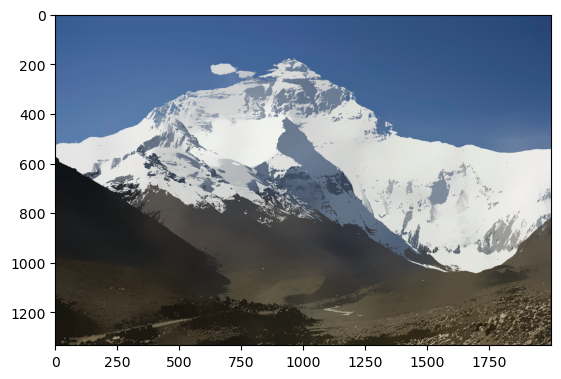

In [7]:
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
luv = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
res = cv2.pyrMeanShiftFiltering(luv, 50, 30)
rgb = cv2.cvtColor(res, cv2.COLOR_LUV2RGB)
plt.imshow(rgb)

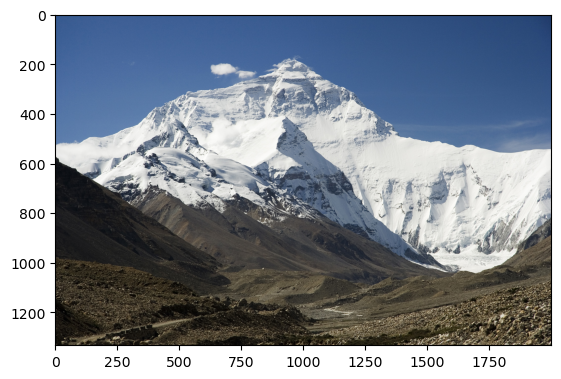

In [9]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGBA))